In [1]:
import numpy as np
import astropy
import photutils
import ccdproc
from ccdproc import CCDData, combiner
from astropy import units as u
import astropy.io.fits as fits
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils import centroid_com, centroid_1dg, centroid_2dg
from photutils import CircularAperture
from photutils import aperture_photometry
from photutils import Background2D
from photutils import MedianBackground
from photutils import DAOStarFinder
from photutils import detect_sources, deblend_sources, source_properties
from scipy.ndimage import shift
import gc                               

from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import csv

import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

C:\Users\Msi Raider\AppData\Local\Temp\ipykernel_13648\2219759727.py:12: DeprecationWarning: `photutils.centroid_com` is a deprecated alias for `photutils.centroids.centroid_com`. Instead, please use `from photutils.centroids import centroid_com` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg
C:\Users\Msi Raider\AppData\Local\Temp\ipykernel_13648\2219759727.py:12: DeprecationWarning: `photutils.centroid_1dg` is a deprecated alias for `photutils.centroids.centroid_1dg`. Instead, please use `from photutils.centroids import centroid_1dg` to silence this warning.
  from photutils import centroid_com, centroid_1dg, centroid_2dg
C:\Users\Msi Raider\AppData\Local\Temp\ipykernel_13648\2219759727.py:12: DeprecationWarning: `photutils.centroid_2dg` is a deprecated alias for `photutils.centroids.centroid_2dg`. Instead, please use `from photutils.centroids import centroid_2dg` to silence this warning.
  from photutils import centroid_com, centroid_1dg, ce

In [2]:
#Importing images and finding some basic statistics and creating the seg-image.

scimV=CCDData.read("NGC_2323_V_median.fits", unit="adu")
medV=np.median(scimV.data)
scimV.data=scimV.data-medV
meanV, medianV, stdV = astropy.stats.sigma_clipped_stats(scimV.data, sigma=3.0, maxiters=5)    
print('Image stats (mean, median and standard deviation):', meanV,medianV,stdV)

segimageV=detect_sources(scimV.data, 2.00*stdV, 9, connectivity=4, mask=None)

INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]
Image stats (mean, median and standard deviation): -0.08008133 -0.14718175 7.293692


In [3]:
#Importing images and finding some basic statistics and creating the seg-image.

scimB=CCDData.read("NGC_2323_B_median.fits", unit="adu")
medB=np.median(scimB.data)
scimB.data=scimB.data-medB
meanB, medianB, stdB = astropy.stats.sigma_clipped_stats(scimB.data, sigma=3.0, maxiters=5)    
print('Image stats (mean, median and standard deviation):', meanB,medianB,stdB)

segimageB=detect_sources(scimB.data, 2.00*stdB, 9, connectivity=4, mask=None)

INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]
Image stats (mean, median and standard deviation): -0.028624188 -0.06648508 4.731453


In [4]:
#Importing images and finding some basic statistics and creating the seg-image.

scimR=CCDData.read("NGC_2323_R_median.fits", unit="adu")
medR=np.median(scimR.data)
scimR.data=scimR.data-medR
meanR, medianR, stdR = astropy.stats.sigma_clipped_stats(scimR.data, sigma=3.0, maxiters=5)    
print('Image stats (mean, median and standard deviation):', meanR,medianR,stdR)

segimageR=detect_sources(scimR.data, 2.00*stdR, 9, connectivity=4, mask=None)

INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]
Image stats (mean, median and standard deviation): -0.14576085 -0.27674 11.854237


In [5]:
#Creating the outfile for the seg-images

outfile="segimageV.fits"                # Set the output file name
hdu=fits.PrimaryHDU(segimageV)          # Define a FITS header for this data
hdu.writeto(outfile,clobber="True")    # Write the output, and clobber (overwrite) existing files if needed. 

In [6]:
#Creating the outfile for the seg-images

outfile="segimageB.fits"                # Set the output file name
hdu=fits.PrimaryHDU(segimageB)          # Define a FITS header for this data
hdu.writeto(outfile,clobber="True")    # Write the output, and clobber (overwrite) existing files if needed. 

In [7]:
#Creating the outfile for the seg-images

outfile="segimageR.fits"                # Set the output file name
hdu=fits.PrimaryHDU(segimageR)          # Define a FITS header for this data
hdu.writeto(outfile,clobber="True")    # Write the output, and clobber (overwrite) existing files if needed. 

In [8]:
#Creating the source table and checking its length

source_tableV=source_properties(scimV.data, segimageV, error=None, mask=None, background=None, filter_kernel=None, wcs=None, labels=None)
print('Source table length:\n', len(source_tableV))
print('First entry centroid y and x values :') # The dreaded y-x
print(source_tableV[0].centroid[0].value, source_tableV[0].centroid[1].value)

        Use `~photutils.segmentation.SourceCatalog` instead. [warnings]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


Source table length:
 427
First entry centroid y and x values :
1.6311460559870794 18.56139776013059


In [9]:
# Checking #Creating the source table and checking its length
source_tableB=source_properties(scimB.data, segimageB, error=None, mask=None, background=None, filter_kernel=None, wcs=None, labels=None)
print('Source table length:\n', len(source_tableB))
print('First entry centroid y and x values :') # The dreaded y-x
print(source_tableB[0].centroid[0].value, source_tableB[0].centroid[1].value)

        Use `~photutils.segmentation.SourceCatalog` instead. [warnings]


Source table length:
 356
First entry centroid y and x values :
1.2855738963469188 26.353812011790957


In [10]:
#Creating the source table and checking its length

source_tableR=source_properties(scimR.data, segimageR, error=None, mask=None, background=None, filter_kernel=None, wcs=None, labels=None)
print('Source table length:\n', len(source_tableR))
print('First entry centroid y and x values :') # The dreaded y-x
print(source_tableR[0].centroid[0].value, source_tableR[0].centroid[1].value)

        Use `~photutils.segmentation.SourceCatalog` instead. [warnings]


Source table length:
 417
First entry centroid y and x values :
1.0736088136548152 24.762141995558874


In [11]:
# Finding all the postitions for the centroids using phot_table R as the automated algorythm seems to work best with
# the R values

positionsV=[]
removed = 0
for obj in source_tableR:
    x = obj.centroid[1].value - 1
    y = obj.centroid[0].value + 1
    if x > 0 and y > 0:
        positionsV.append((obj.centroid[1].value - 6, obj.centroid[0].value + 1))
    else:
        positionsV.append((obj.centroid[1].value - 6, obj.centroid[0].value + 1))
        removed += 1
print(removed)
#print(positionsR) # Print example values from the positions list.

0


In [12]:
# Finding all the postitions for the centroids using phot_table R as the automated algorythm seems to work best with
# the R values

positionsB=[]
removed = 0
for obj in source_tableR:
    x = obj.centroid[1].value - 1
    y = obj.centroid[0].value + 1
    if x > 0 and y > 0:
        positionsB.append((obj.centroid[1].value - 1, obj.centroid[0].value + 1))
    else:
        removed += 1
print(removed)
#print(positionsR) # Print example values from the positions list.

0


In [13]:
# Finding all the postitions for the centroids using phot_table R as the automated algorythm seems to work best with
# the R values

positionsR=[]
removed = 0
for obj in source_tableR:
    x = obj.centroid[1].value
    y = obj.centroid[0].value
    if x > 0 and y > 0:
        positionsR.append((obj.centroid[1].value, obj.centroid[0].value))
    else:
        removed += 1
print(removed)
#print(positionsR) # Print example values from the positions list.

0


 id      xcenter            ycenter           aperture_sum     aperture_sum_err 
           pix                pix                 adu                adu        
--- ------------------ ------------------ ------------------- ------------------
  1 18.762141995558874  2.073608813654815  2313.4496255545237  233.6572143605703
  2  613.6264046589213 1.6352108587075156   541.4911913897067 203.49895887327813
  3  420.0665489691527 11.890303882280701  -916.6240921916985 245.40360630989133
  4  540.7032537415674 12.746614608084501  1753.7047280577733 254.63772455547368
  5   111.337845572089 16.810637506954528   54115.27303083895  434.6788667154563
  6  306.9326891938005 12.785833426754923 -3263.7298541316068  252.0737169619267
  7 1177.8551486731055  21.05427575542496   72522.64836779705  547.7563187253645
  8 1476.8275122125485 24.754750253655104  13100.301117702827 303.39600499386194
  9 1210.0667215775863  28.42467454418926    95545.9757893529  689.9590456984022
 10  1552.540060978431  26.3

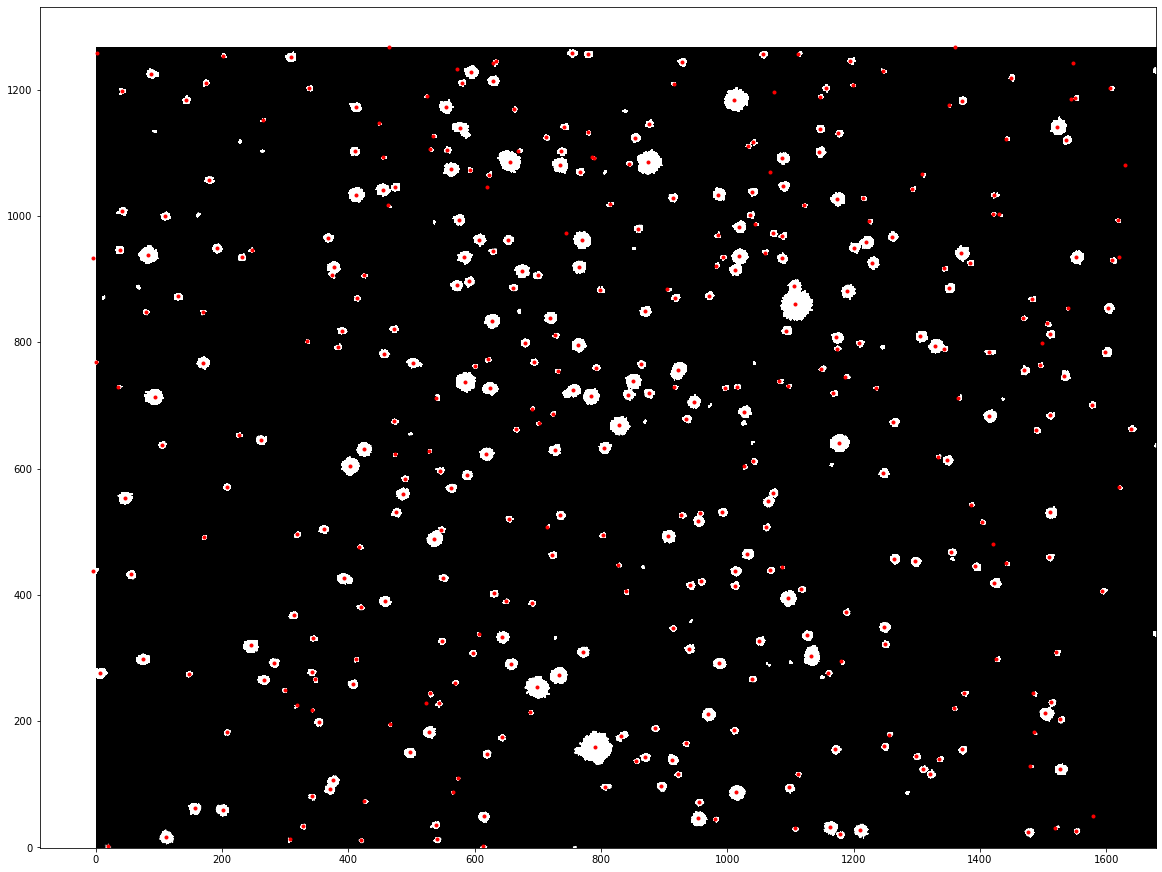

In [14]:
#Carrying out aperture photometry

apertures = CircularAperture(positionsV, r=20.0) #Creates 20 pixel radius apertures around each of the 354 coordinates
phot_tableV = aperture_photometry(scimV, apertures) #Uses the circular apertures defined previously to count the sum of 
print(phot_tableV)

#Showing the images and then showing where the middle of the appertures ended up

plt.figure(figsize=(20,20))
plt.imshow(segimageV.data, cmap='gray', vmin=0, vmax=1, origin='lower')
plt.plot(phot_tableV["xcenter"],phot_tableV["ycenter"],'r.')

 id      xcenter            ycenter           aperture_sum     aperture_sum_err 
           pix                pix                 adu                adu        
--- ------------------ ------------------ ------------------- ------------------
  1 23.762141995558874  2.073608813654815  1242.3068156624208  195.4393719384883
  2  618.6264046589213 1.6352108587075156  -261.3624263279063  164.1521042067833
  3  425.0665489691527 11.890303882280701 -194.76191971160324  194.5947460740317
  4  545.7032537415674 12.746614608084501  2128.2390772840395 201.67431141956757
  5   116.337845572089 16.810637506954528   38227.01752307928   375.665248941351
  6  311.9326891938005 12.785833426754923  -837.5305474819794 204.33567538785778
  7 1182.8551486731055  21.05427575542496   66972.87296860534   462.485023719294
  8 1481.8275122125485 24.754750253655104  11425.293986294466 238.80126312559423
  9 1215.0667215775863  28.42467454418926  55268.717055435525 393.74620729485963
 10  1557.540060978431  26.3

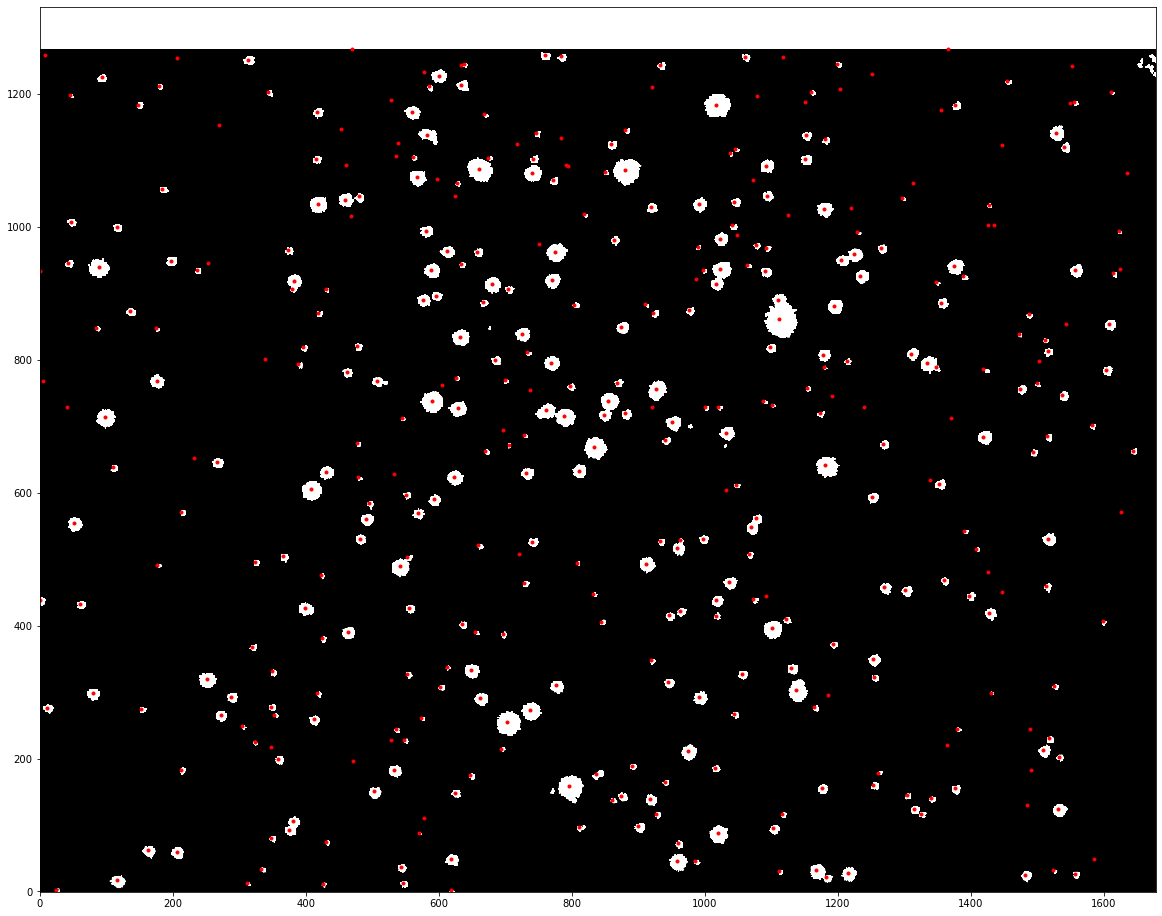

In [15]:
apertures = CircularAperture(positionsB, r=20.0) #Creates 20 pixel radius apertures around each of the 354 coordinates
phot_tableB = aperture_photometry(scimB, apertures) #Uses the circular apertures defined previously to count the sum of 
print(phot_tableB)

plt.figure(figsize=(20,20))
plt.imshow(segimageB.data, cmap='gray', vmin=0, vmax=1, origin='lower')
plt.plot(phot_tableB["xcenter"],phot_tableB["ycenter"],'r.')

 id      xcenter            ycenter           aperture_sum     aperture_sum_err 
           pix                pix                 adu                adu        
--- ------------------ ------------------ ------------------- ------------------
  1 24.762141995558874 1.0736088136548152  -6557.442281914117  318.0813647035236
  2  619.6264046589213 0.6352108587075156 -1416.7434917892854 253.66586458091365
  3  426.0665489691527 10.890303882280701  -5949.486412826446  318.0956189010447
  4  546.7032537415674 11.746614608084501 -1108.6098187585565 321.91035998140626
  5   117.337845572089 15.810637506954528  45519.311473448906  591.2285643929978
  6  312.9326891938005 11.785833426754923  -9922.447756525162  330.0980093881908
  7 1183.8551486731055  20.05427575542496   72459.44916059393  633.4678793660937
  8 1482.8275122125485 23.754750253655104  23776.290299317057  414.3379773683106
  9 1216.0667215775863  27.42467454418926  119947.71042072118  886.5519088394543
 10  1558.540060978431  25.3

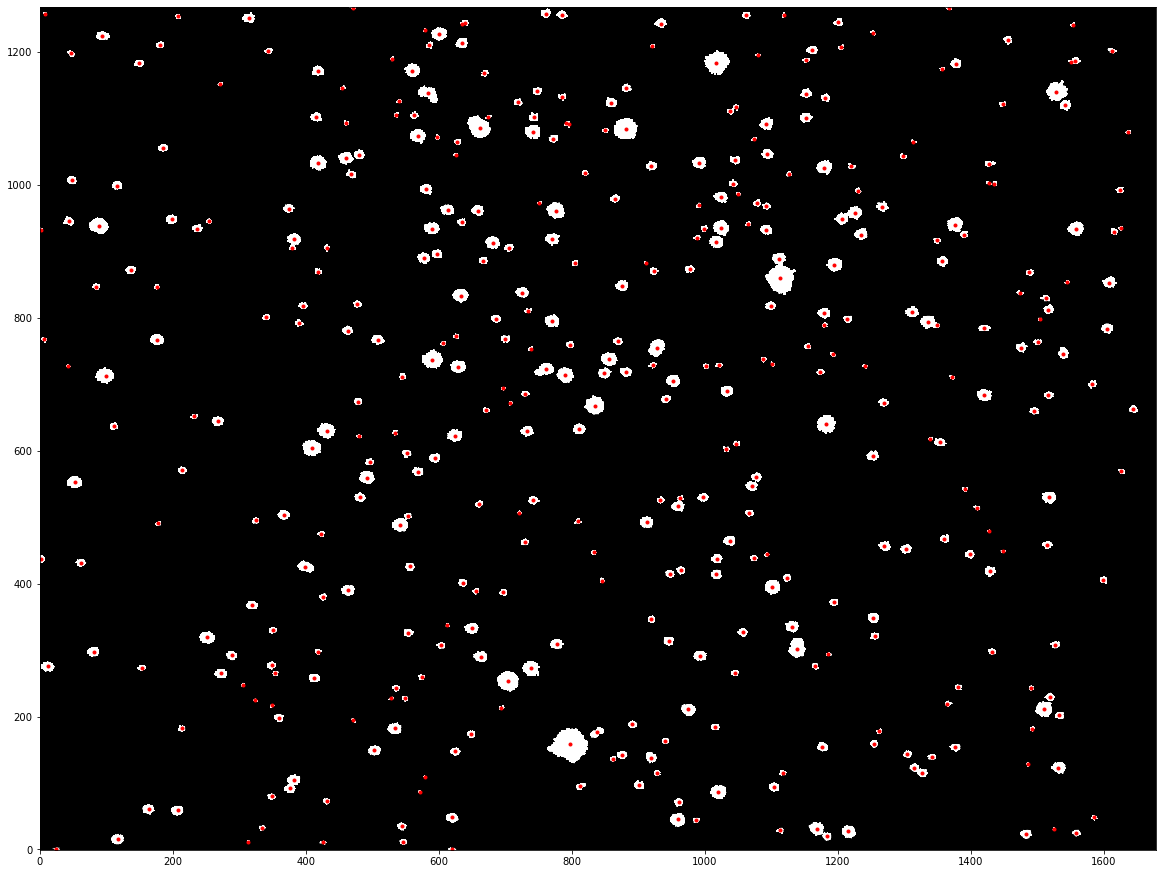

In [16]:
apertures = CircularAperture(positionsR, r=20.0) #Creates 20 pixel radius apertures around each of the 354 coordinates
phot_tableR = aperture_photometry(scimR, apertures) #Uses the circular apertures defined previously to count the sum of 
print(phot_tableR)

plt.figure(figsize=(20,20))
plt.imshow(segimageR.data, cmap='gray', vmin=0, vmax=1, origin='lower')
plt.plot(phot_tableR["xcenter"],phot_tableR["ycenter"],'r.')

In [17]:
# B and V magnitude data for one of the stars in the cluster

V = 9.91
B = 10.06

In [18]:
#Creating a magnitudes list for all non-nan values

obj_brightV = []

for obj in phot_tableV:
        if obj['xcenter'].value>1100 and obj['xcenter'].value<1200 and obj['ycenter'].value<680 and obj['ycenter'].value>600: #Here I'm guiding where to look for the star in the list of coordinates
            print(obj['xcenter'].value, obj['ycenter'].value, obj['aperture_sum']) 
            obj_brightV.append(obj['aperture_sum'].value)

id_usedV = []
maglistV1=[]
for obj in phot_tableV:
    if obj['aperture_sum'].value > 0:
        maglistV1.append(-2.5*np.log10(obj['aperture_sum'].value/obj_brightV[0])+V) #using the same equation as task 18, except does it for every star in the list to create a list of magnitudes
        id_usedV.append(obj['id'])
    else:
        pass
print(len(maglistV1))

1176.133592583324 641.0336751014156 429555.83987777575 adu
384


In [19]:
#Creating a magnitudes list for all non-nan values

obj_brightB = []
for obj in phot_tableB:
        if obj['xcenter'].value>1100 and obj['xcenter'].value<1200 and obj['ycenter'].value<680 and obj['ycenter'].value>600: #Here I'm guiding where to look for the star in the list of coordinates
            print(obj['xcenter'].value, obj['ycenter'].value, obj['aperture_sum'],obj["id"]) 
            obj_brightB.append(obj['aperture_sum'].value)

id_usedB = []
maglistB1=[]
for obj in phot_tableB:
    if obj['aperture_sum'].value > 0:
        maglistB1.append(-2.5*np.log10(obj['aperture_sum'].value/obj_brightV[0])+V) #using the same equation as task 18, except does it for every star in the list to create a list of magnitudes
        id_usedB.append(obj['id'])
    else:
        pass
print(len(maglistB1))

1181.133592583324 641.0336751014156 316351.845379594 adu 182
362


In [20]:
# Finding all the usable values that show up in both the V and B band to end up woth 2 lists of the same lenght

magb = []
magv = []
ids_finalb = []
ids_finalv = []
for i in range(0,len(id_usedB)):
    for j in range(0,len(id_usedV)):
        if id_usedB[i] == id_usedV[j]:
            magb.append(maglistB1[i])
            magv.append(maglistV1[j])
            ids_finalb.append(id_usedB[i])
            ids_finalv.append(id_usedV[j])
        else:
            pass

In [21]:
#Creating the B-V list

B_V = []
for i in range(0,len(magb)):
    B_V.append(magb[i]-magv[i])

Text(0, 0.5, 'V')

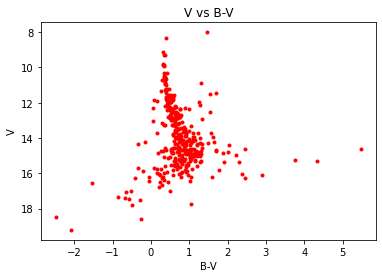

In [22]:
# Plotting V vs B-V

plt.gca().invert_yaxis()
plt.plot(B_V,magv,'r.')
plt.title("V vs B-V")
plt.xlabel("B-V")
plt.ylabel("V")

In [23]:
#Defines a function that takes data from a given isochrone file and creates a a list for v magnitudes and b-v magnitudes
def iso(file: str) -> list:
    f = open(file)
    lines = f.readlines()
    
    v = []
    b = []
    b_v = []
    for x in lines:
        if x[0] != '#':
            y = x.split()
            b.append(float(y[30]))
            v.append(float(y[31]))

    f.close()
    

    b_v = np.array(b)-np.array(v)
    v = np.array(v)
    
    print('done')
    return v, b_v

#def vshift(vlst: list) -> list:

In [24]:
# Reading in isochrones

v6, bv6 = iso("1e6isochrone.dat")
v7, bv7 = iso("1e7isochrone.dat")
v8, bv8 = iso("1e8isochrone.dat")
v8_5, bv8_5 = iso("1.5e8isochrone.dat")
v9, bv9 = iso("1e9isochrone.dat")

done
done
done
done
done


<function matplotlib.pyplot.show(close=None, block=None)>

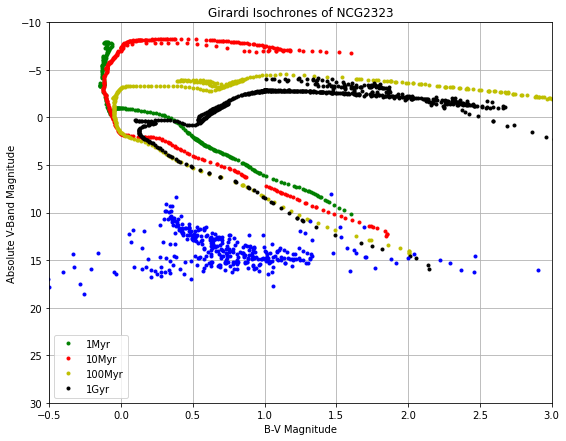

In [25]:
# Plotting in all the isochrones and the unshifted data

plt.figure(figsize = (9,7))
plt.plot(bv6, v6,'g.', label='1Myr')
plt.plot(bv7, v7,'r.', label='10Myr')
plt.plot(bv8, v8,'y.', label='100Myr')
plt.plot(bv9, v9,'k.', label='1Gyr')
plt.plot(B_V,magv,'b.')

plt.axis([-0.5,3,30,-10])
#plt.gca().invert_yaxis()
plt.grid(True)
plt.title('Girardi Isochrones of NCG2323')
plt.xlabel('B-V Magnitude')
plt.ylabel('Absolute V-Band Magnitude')
plt.legend(loc='lower left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

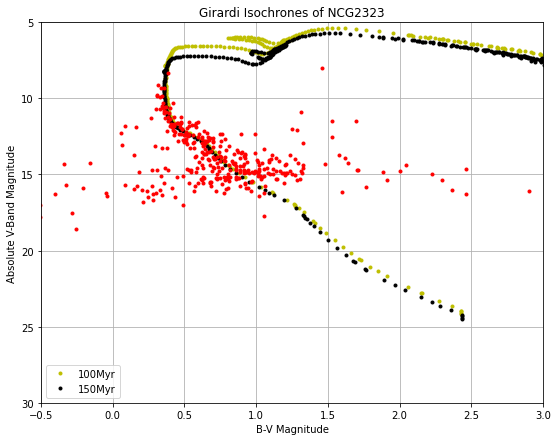

In [26]:
# Plotting in the 150 Myr and 100 Myr isochrones and shifting the observed data to fit the isochrones

plt.figure(figsize = (9,7))
plt.plot(bv8+0.42, v8+9.9,'y.', label='100Myr')
plt.plot(bv8_5+0.4, v8_5+9.9,'k.', label='150Myr')
plt.plot(B_V,magv,'r.')

plt.axis([-0.5,3,30,5])
#plt.gca().invert_yaxis()
plt.grid(True)
plt.title('Girardi Isochrones of NCG2323')
plt.xlabel('B-V Magnitude')
plt.ylabel('Absolute V-Band Magnitude')
plt.legend(loc='lower left')
plt.show

In [27]:
# Scaling the observed data to get the magnitudes

ScaledB_V = np.array(B_V)-0.4
ScaledV = np.array(magv)-9.9
ScaledB = ScaledB_V + ScaledV

Text(0, 0.5, 'Counts')

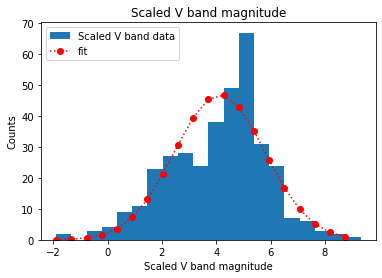

In [28]:
# Showing the V absolute magnitude in a histogram

plt.hist(ScaledV,bins = 20, label = "Scaled V band data")

x =np.asarray( [-1.89141558,-1.3314773 , -0.77153901, -0.21160073,  0.34833756,
         0.90827585,  1.46821413,  2.02815242,  2.5880907 ,  3.14802899,
         3.70796728,  4.26790556,  4.82784385,  5.38778213,  5.94772042,
         6.50765871,  7.06759699,  7.62753528,  8.18747356,  8.74741185,])
y = np.asarray([ 2.,  0.,  3.,  4.,  9., 11., 23., 27., 28., 24., 38., 49., 67.,
        31., 24.,  7.,  6.,  3.,  2.,  1.])

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[70,5,2])

plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title("Scaled V band magnitude")
plt.xlabel("Scaled V band magnitude")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

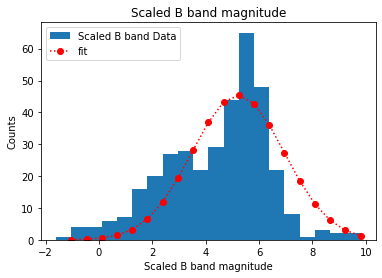

In [29]:
# Showing the B absolute magnitude in a histogram
plt.hist(ScaledB,bins = 20, label = "Scaled B band Data")
y = np.array([ 1.,  4.,  4.,  6.,  7., 16., 20., 27., 28., 22., 29., 44., 65.,
        48., 22.,  8.,  1.,  3.,  2.,  2.])
x = np.array([-1.03024481, -0.46006991,  0.11010499,  0.68027989,
         1.25045479,  1.82062969,  2.39080459,  2.96097949,  3.53115439,
         4.10132929,  4.67150419,  5.24167909,  5.81185399,  6.38202889,
         6.95220379,  7.52237869,  8.09255359,  8.66272849,  9.23290339,
         9.80307829])

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[65,5.5,2])

plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title("Scaled B band magnitude")
plt.xlabel("Scaled B band magnitude")
plt.ylabel("Counts")

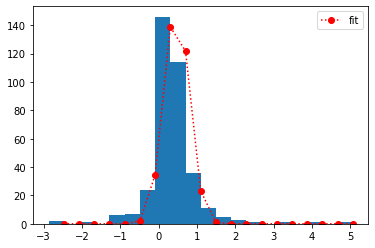

In [30]:
# Showing the B - V absolute magnitude in a histogram

plt.hist(ScaledB_V,bins = 20)

y = np.array([  2.,   0.,   1.,   0.,   6.,   7.,  24., 146., 114.,  36.,  11.,
          5.,   3.,   1.,   0.,   1.,   0.,   1.,   0.,   1.])
x = np.array([ -2.47223451, -2.07548551, -1.6787365 , -1.2819875 ,
        -0.88523849, -0.48848949, -0.09174049,  0.30500852,  0.70175752,
         1.09850653,  1.49525553,  1.89200453,  2.28875354,  2.68550254,
         3.08225154,  3.47900055,  3.87574955,  4.27249856,  4.66924756,
         5.06599656])

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[140,0.5,1])

plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()

In [31]:
# Calculating the distance

distance = 10**(9.9/5)*10
print(distance)

954.9925860214358


L is prop to M^3.5, so we convert magnitude to luminosity

In [32]:
# Calcauulating the luminocities of all the observed stars

l0 = 3.846*(10**26) #sun luminosity (watts)
luminosity = []

for M in ScaledV:
    idx = (4.83-M)/2.5
    L = l0 * 10**(idx) 
    luminosity.append(L/l0)
print(max(luminosity))
print(min(luminosity))

488.1645450930923
0.016183033965078614


In [33]:
# Calcauulating the masses of all the observed stars

mass = []
for l in luminosity:
    m = l**(1/3.5)
    mass.append(m)
print(min(mass))
print(str(max(mass))+' M0')
print(np.average(mass))

0.3078242582238976
5.863565502983975 M0
1.3733417779365824


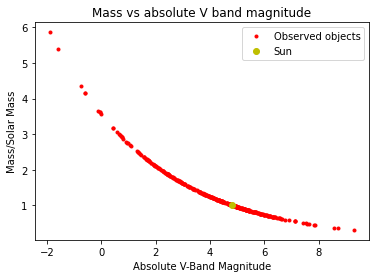

In [34]:
# Plotting the Initial mass function

plt.xlabel('Absolute V-Band Magnitude')
plt.ylabel('Mass/Solar Mass')
plt.plot(ScaledV,mass,'r.', label = "Observed objects")
plt.plot(4.83,1,'yo', label='Sun')
plt.title("Mass vs absolute V band magnitude")
plt.legend()

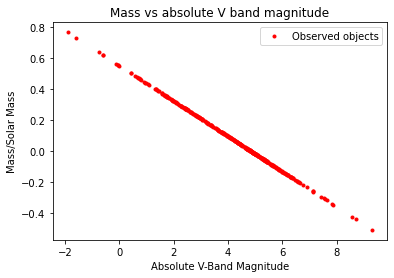

In [35]:
plt.xlabel('Absolute V-Band Magnitude')
plt.ylabel('Mass/Solar Mass')
plt.plot(ScaledV,np.log10(mass),'r.', label = "Observed objects")
plt.title("Mass vs absolute V band magnitude")
plt.legend()

In [36]:
print((np.log10(mass[1]) - np.log10(mass[30]))/(ScaledV[1] - ScaledV[30]))

-0.11428571428571421


The initial mass function was as expected. The yellow dot on it is the mass of our sun vs its V band magnitude. This show that the relation also fits well with our sun

Text(0.5, 1.0, 'The number of each M/Msun')

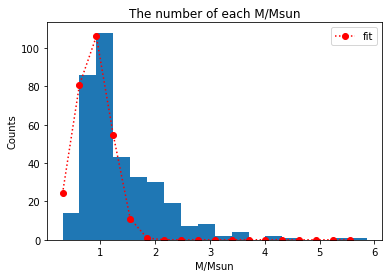

In [37]:
# Showing the masses using a histogram

plt.hist(mass, bins = 18)

y = np.array([ 14.,  86., 108.,  43.,  33.,  30.,  19.,   7.,   8.,   2.,   4.,
          0.,   2.,   1.,   0.,   0.,   1.,   1.])
x = np.array([0.30782426, 0.61647655, 0.92512884, 1.23378113, 1.54243342,
        1.85108572, 2.15973801, 2.4683903 , 2.77704259, 3.08569488,
        3.39434717, 3.70299946, 4.01165175, 4.32030405, 4.62895634,
        4.93760863, 5.24626092, 5.55491321])

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[108,2.82,0.5])

plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.xlabel("M/Msun")
plt.ylabel("Counts")
plt.title("The number of each M/Msun")

As expected there were a lot of stars around the mas of our sun

In [38]:
x = [0.30782426, 0.61647655, 0.92512884, 1.23378113, 1.54243342,
        1.85108572, 2.15973801, 2.4683903 , 2.77704259, 3.08569488,
        3.39434717, 3.70299946, 4.01165175, 4.32030405, 4.62895634,
        4.93760863, 5.24626092, 5.55491321]

y = [ 14.,  86., 108.,  43.,  33.,  30.,  19.,   7.,   8.,   2.,   4.,
          0.,   2.,   1.,   0.,   0.,   1.,   1.]
print(len(x), len(y))

18 18


In [39]:
fit = np.polyfit(x,y,1)
print(fit[0])

-13.263829119529591


In [40]:
xplot = np.linspace(x[0],x[13],100)
yplot = fit[0]*xplot + fit[1] 

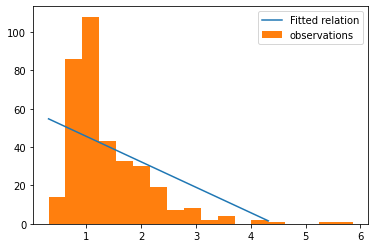

In [41]:
plt.plot(xplot,yplot, label = "Fitted relation")
plt.hist(mass, bins = 18, label = "observations")
plt.legend()

As expected most of the object that were observed had a mass ranging from 0.5 to 2 solar masses. We did a fit of number of objects vs mass to see how that changed as the mass increased. The gradient of the fit was approximatelly -13.2. Each bin corresponds to about 0.33 of a solar mass. So as mass increases by 0.33 solar masses there are 13.2 less objects of the new mass

Text(0, 0.5, 'Counts')

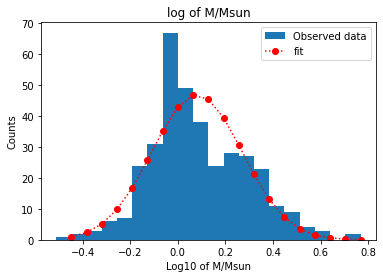

In [42]:
plt.hist(np.log10(mass), bins = 20, label = "Observed data")

x =np.array( [-4.47704211e-01, -3.83711264e-01, -3.19718317e-01,
        -2.55725370e-01, -1.91732424e-01, -1.27739477e-01, -6.37465296e-02,
         2.46417405e-04,  6.42393644e-02,  1.28232311e-01,  1.92225258e-01,
         2.56218205e-01,  3.20211152e-01,  3.84204099e-01,  4.48197046e-01,
         5.12189993e-01,  5.76182940e-01,  6.40175887e-01,  7.04168834e-01,
         7.68161781e-01])
y = np.array([ 1,  2,  3,  6,  7, 24, 31, 67, 49, 38, 24, 28, 27,
        23, 11,  9,  4,  3,  0,  2])

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[70,0,0.2])


plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title("log of M/Msun")
plt.xlabel("Log10 of M/Msun")
plt.ylabel("Counts")

Taking the log of the M/Msun as the first step towards the initial mass function

Text(0, 0.5, 'Log10(Counts)')

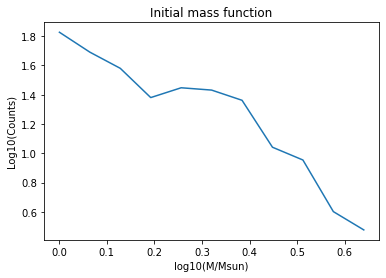

In [43]:
xlog = [ 2.46417405e-04,  6.42393644e-02,  1.28232311e-01,  1.92225258e-01,
         2.56218205e-01,  3.20211152e-01,  3.84204099e-01,  4.48197046e-01,
         5.12189993e-01,  5.76182940e-01,  6.40175887e-01]#,  7.04168834e-01, 7.68161781e-01]
ylog = [ 67., 49., 38., 24., 28., 27.,
        23., 11.,  9.,  4.,  3.]#,  0.,  2.]
ylog = np.log10(ylog) 

plt.plot(xlog,ylog)
plt.title("Initial mass function")
plt.xlabel("log10(M/Msun)")
plt.ylabel("Log10(Counts)")

The aplha of the initial mass function is :-1.9514938494237597


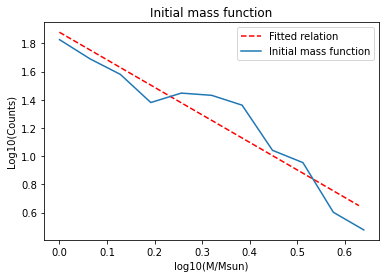

In [44]:
fit = np.polyfit(xlog,ylog,1)
a = fit[0]
print("The aplha of the initial mass function is :" + str(a))

x = np.linspace(0,0.63,50)
y = x*fit[0] + fit[1]

plt.plot(x,y, 'r--', label = "Fitted relation")
plt.plot(xlog,ylog, label = "Initial mass function")
plt.title("Initial mass function")
plt.xlabel("log10(M/Msun)")
plt.ylabel("Log10(Counts)")
plt.legend()

For the initial mass function a few changes were made to the data. First everything under 0 (or 1 solar mass) was ignored. This was due to object that are smaller than the sun being difficult to observe which leads to there being far fewer objects bellow 0 when there should be more of them leading to an incorrect initial mass function. The last two data points weer also ignored as the second last data point was a zero that gave back an error when you tried to take the log of it.

Things for the extension

In [45]:
# Calculating the ages of all the observed objects

age = []
for m in mass:
    age.append(m**(-2.5)*12.1)
#print(age)

age = np.array(age)

(array([209., 100.,  30.,   7.,   4.,   1.,   3.,   2.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.45338582e-01, 1.16460297e+01, 2.31467209e+01, 3.46474120e+01,
        4.61481031e+01, 5.76487943e+01, 6.91494854e+01, 8.06501765e+01,
        9.21508677e+01, 1.03651559e+02, 1.15152250e+02, 1.26652941e+02,
        1.38153632e+02, 1.49654323e+02, 1.61155014e+02, 1.72655706e+02,
        1.84156397e+02, 1.95657088e+02, 2.07157779e+02, 2.18658470e+02,
        2.30159161e+02]),
 <BarContainer object of 20 artists>)

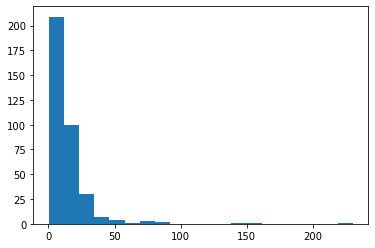

In [46]:
plt.hist(age, bins = 20, label = "Observed data")

Text(0.5, 1.0, 'Life expectancy of stars in billions of years')

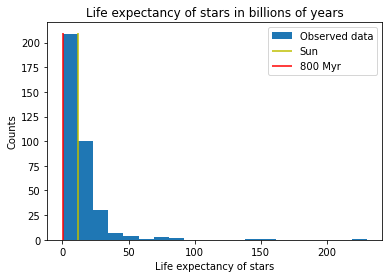

In [47]:
# Showing the ages of the stars in a histogram

plt.hist(age, bins = 20, label = "Observed data")
plt.vlines(ymin = 0, ymax = 210, x = 12.1, color='y', label = 'Sun')
plt.vlines(ymin = 0, ymax = 210, x = 0.8, color='r', label = '800 Myr')
plt.legend()
plt.ylabel("Counts")
plt.xlabel("Life expectancy of stars")
plt.title("Life expectancy of stars in billions of years")

In [48]:
print("The minimun life expactancy of a star in the cluster is: " + str(min(age)) + " Gyr")
print("The maximum life expactancy of a star in the cluster is: " + str(max(age)) + " Gyr")
print("The average life expactancy of the stars in the cluster is: " + str(np.mean(age)) + " Gyr")

The minimun life expactancy of a star in the cluster is: 0.14533858163045457 Gyr
The maximum life expactancy of a star in the cluster is: 230.15916128870745 Gyr
The average life expactancy of the stars in the cluster is: 13.579977570337366 Gyr


These results show that there aren't any stars younger than the age of the cluster as expected. It also show that there are many different mass stars in the cluster. 

In [49]:
surv = 0
doesnt = 0

for i in range(0,len(age)):
    if age[i] > 0.8:
        surv = surv + 1
    else:
        doesnt = doesnt + 1
        
print(surv)
print(doesnt)

345
14


The literature time the oepn clusters survive for is around 900Myr. We tested to see how many stars are still expected to have lifetimes longer than that. We found that only 18 had shorter lifetimes.

In [50]:
c = (surv/(surv+doesnt))*100
print("The amount of stars that survive for more than 800 Myr are: " + str(c) + "%")

The amount of stars that survive for more than 800 Myr are: 96.10027855153204%


In [52]:
Seq = []
Name = []
Rco = []
Rcl = []
RV = []
e_RV = []
Distance = []
log_age = []

f = open("Angular_rad_format.txt")
lines = f.readlines()
for x in lines:
    y = x.split(",")
    Seq.append(y[0])
    Name.append(y[1])
    Rco.append((y[2]))
    Rcl.append((y[3]))
    RV.append((y[4]))
    e_RV.append((y[5]))
    Distance.append((y[6]))
    log_age.append((y[7]))

In [53]:
Rco_arc = []
Rcl_arc = []

for i in range(0,len(Rco)):
    Rco_arc.append(float(Rco[i])*3600)
    Rcl_arc.append(float(Rcl[i])*3600)

In [54]:
size_co = []
size_cl = []

for i in range(0,len(Rco_arc)):
    size_co.append(Rco_arc[i]*float(Distance[i]))
    size_cl.append(Rcl_arc[i]*float(Distance[i]))

In [55]:
log_age_num = []

for i in range(0,len(log_age)):
    log_age_num.append(float(log_age[i]))

In [56]:
age_num = []

for i in range(0,len(log_age_num)):
    age_num.append((10**log_age_num[i])/(1*10**6))

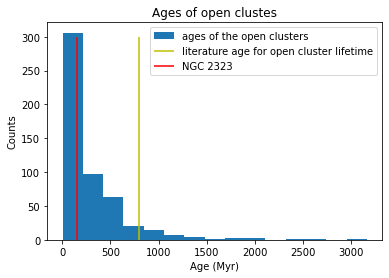

In [57]:
plt.hist(age_num, bins = 15, label = "ages of the open clusters")
plt.vlines(ymin = 0, ymax = 300, x = 800, color='y', label = 'literature age for open cluster lifetime')
plt.vlines(ymin = 0, ymax = 300, x = 150, color='r', label = 'NGC 2323')
plt.title("Ages of open clustes")
plt.ylabel("Counts")
plt.xlabel("Age (Myr)")
plt.legend()

In [58]:
above = 0
below = 0

for i in range(0,len(age_num)):
    if age_num[i] > 800:
        above = above + 1
    else:
        below = below + 1
        
print(above)
print(below)

37
483


In [59]:
c = (above/(above+ below))*100
print("The percentage of open clusters above the 900 Myr age is: " + str(c) + "%")

The percentage of open clusters above the 900 Myr age is: 7.115384615384615%


In [60]:
s = (0.284*1650)*950
s_min = (0.284*0.9*1650)*800
s_max = (0.284*1.1*1650)*1100

log_cl = []
log_co = []

for i in range(0,len(size_co)):
    log_cl.append(np.log10(np.float(size_cl[i])))
    log_co.append(np.log10(np.float(size_co[i])))

C:\Users\Msi Raider\AppData\Local\Temp\ipykernel_13648\1405561880.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  log_cl.append(np.log10(np.float(size_cl[i])))
C:\Users\Msi Raider\AppData\Local\Temp\ipykernel_13648\1405561880.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  log_co.append(np.log10(np.float(size_co[i])))


In [61]:
age_2323 = np.log10(150*10**6)
dist_2323 = np.log10(s)
dist_max = np.log10(s_max)
dist_min = np.log10(s_min)

Text(0.5, 1.0, 'Size of clusters vs age')

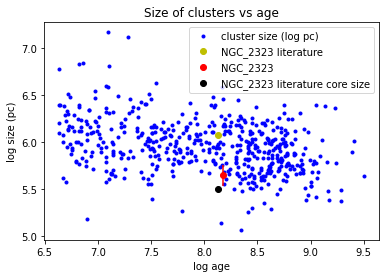

In [62]:
plt.plot(log_age_num,log_cl,'b.',label = "cluster size (log pc)")
plt.plot(log_age_num[117],log_cl[117],'yo',label = "NGC_2323 literature")
plt.plot(age_2323,dist_2323, 'ro', label = "NGC_2323")
plt.plot(log_age_num[117],log_co[117],'ko',label = "NGC_2323 literature core size")
plt.legend()
plt.title("")
plt.xlabel("log age")
plt.ylabel("log size (pc)")
plt.vlines(ymin = dist_min, ymax = dist_max, x = age_2323, color='r')
plt.title("Size of clusters vs age")